In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [3]:
X, y = make_regression(n_samples=4, n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

In [4]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [5]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

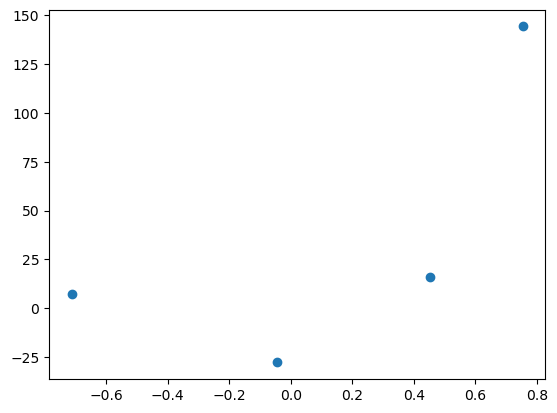

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

First we'll do just using b and keeping m as constant

In [7]:
# Applying OLS before hand to cross check
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [9]:
reg.coef_

array([78.35063668])

In [11]:
reg.intercept_

26.15963284313262

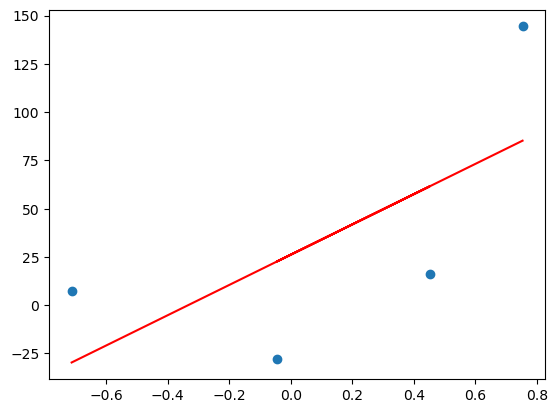

In [13]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color='red')

In [29]:
# Lets apply GD here
# Assume start intercept is b = 0 and m is const

y_pred = (78.35 * X + 0).reshape(4)
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

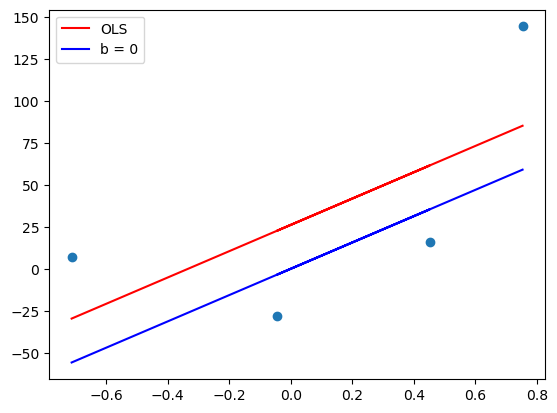

In [30]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label = 'OLS')
plt.plot(X,y_pred, color = 'blue', label = 'b = 0')
plt.legend()

Now what we show is that the blue will move closer and closer to the red one as the epochs grow

In [31]:
m = 78.5
b = 0

In [32]:
loss_slope = -2 * np.sum(y - m * X.ravel() - b)
loss_slope

-209.14302858898708

In [33]:
lr = 0.1

step_size = loss_slope * lr
step_size

-20.914302858898708

In [34]:
b = b - step_size
b

20.914302858898708

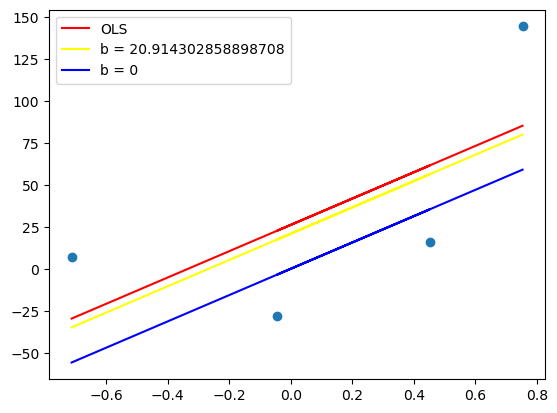

In [35]:
y_pred1 = (78.35 * X + b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label = 'OLS')
plt.plot(X,y_pred1, color = 'yellow', label = 'b = {}'.format(b))
plt.plot(X,y_pred, color = 'blue', label = 'b = 0')

plt.legend()

This shows that how b moved (converged) from 0 to finding near to approx b val just in 1 iteration  
The yellow shows the new line convering towards the red while blue is what it started with

Doing multiple iterations would do the actual answer

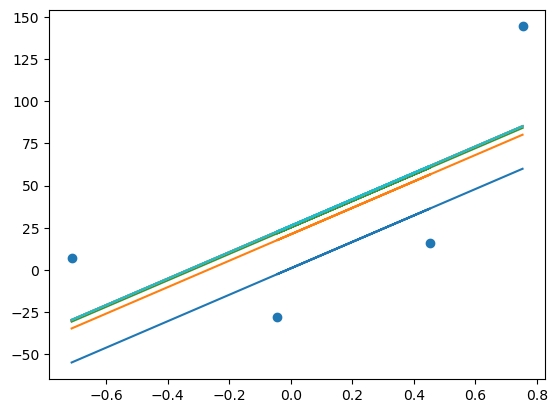

In [46]:
b = -100
m = 78.35
lr = 0.1

epochs = 10

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m * X.ravel() - b)
    b = b - (lr * loss_slope)

    y_pred = (78.35 * X + b).reshape(4)

    plt.plot(X,y_pred)
plt.scatter(X,y)

#### Class Implementation

In [2]:
from sklearn.datasets import make_regression
import numpy as np

In [7]:
X,y = make_regression(n_samples=100,n_features=1, n_informative=1,n_targets=1,noise=20,random_state=13)

In [8]:
import matplotlib.pyplot as plt

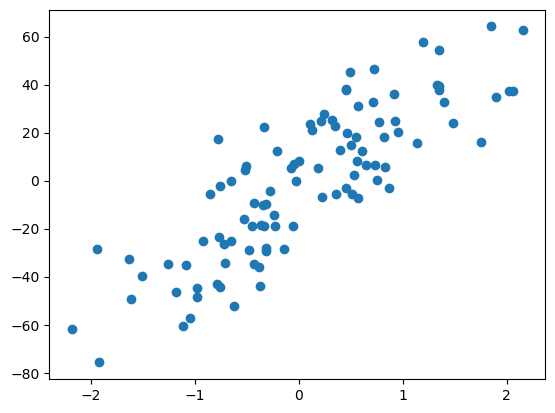

In [9]:
plt.scatter(X,y)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X,y)

LinearRegression()

In [13]:
lr.coef_

array([27.82809103])

In [14]:
lr.intercept_

-2.29474455867698

In [15]:
m = 27.83

In [33]:
class GDRegressor:

    def __init__(self, lr, epochs):
        self.m = m
        self.b = -120
        self.lr = lr
        self.epochs = epochs
    
    def fit(self,X,y):
        # calc b using GD
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m * X.ravel() - self.b)
            self.b = self.b - self.lr * loss_slope
            print(loss_slope,self.b)
        print()
        print("b = ",self.b)


In [43]:
gd = GDRegressor(0.1,10)

In [44]:
gd.fit(X,y)
# This gives too high val bcs LR is high

-23541.028788702548 2234.1028788702547
447279.54698534845 -42493.8518196646
-8498311.392721621 807337.2874524976
161467916.4617108 -15339454.358718583
-3067890412.7725058 291449586.918532
58289917842.67761 -5537542197.349229
-1107508439010.8745 105213301703.73824
21042660341206.617 -1999052732416.9236
-399810546482925.7 37982001915875.65
7596400383175588.0 -721658036401683.2

b =  -721658036401683.2


In [45]:
gd = GDRegressor(0.01,10)

In [47]:
gd.fit(X,y)
# Same as initial value as its its just swinging here and there

-23541.028788702548 115.41028788702548
23541.028788702548 -120.0
-23541.028788702548 115.41028788702548
23541.028788702548 -120.0
-23541.028788702548 115.41028788702548
23541.028788702548 -120.0
-23541.028788702548 115.41028788702548
23541.028788702548 -120.0
-23541.028788702548 115.41028788702548
23541.028788702548 -120.0

b =  -120.0


In [48]:
gd = GDRegressor(0.001,100)
# increase the epochs and dec the learning rate
gd.fit(X,y)

-23541.028788702548 -96.45897121129745
-18832.82303096204 -77.6261481803354
-15066.258424769627 -62.55988975556578
-12053.006739815703 -50.50688301575008
-9642.405391852564 -40.864477623897514
-7713.92431348205 -33.15055331041546
-6171.1394507856385 -26.979413859629823
-4936.91156062851 -22.042502299001313
-3949.52924850281 -18.092973050498504
-3159.623398802248 -14.933349651696256
-2527.6987190417985 -12.405650932654456
-2022.1589752334385 -10.383491957421018
-1617.7271801867507 -8.765764777234267
-1294.1817441494006 -7.471583033084866
-1035.3453953195205 -6.436237637765346
-828.2763162556164 -5.6079613215097295
-662.6210530044933 -4.945340268505236
-530.0968424035943 -4.415243426101641
-424.0774739228756 -3.9911659521787657
-339.2619791383004 -3.6519039730404654
-271.4095833106404 -3.380494389729825
-217.12766664851245 -3.1633667230813125
-173.7021333188099 -2.9896645897625027
-138.96170665504783 -2.850702883107455
-111.16936532403835 -2.7395335177834164
-88.93549225923067 -2.6505980

In [49]:
# Now this is similar to b we obtained in the LinearReg class